In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [10]:
# Load the wine dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
             'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
             'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv(url, header=None, names=col_names)
print(wine.shape)

(178, 14)


In [11]:
print(wine.isnull().sum())

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [12]:
wine.describe()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


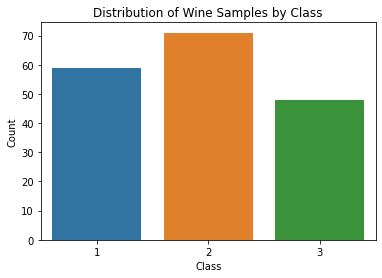

In [4]:
sns.countplot(x='Class', data=wine)
plt.title('Distribution of Wine Samples by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


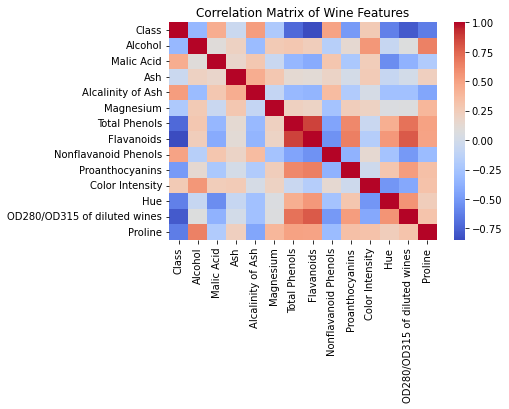

In [5]:
corr = wine.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Features')
plt.show()

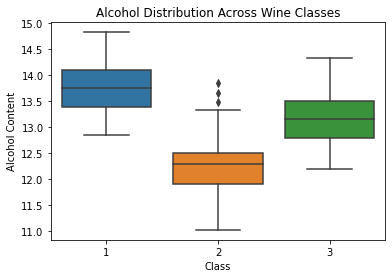

In [6]:
sns.boxplot(x='Class', y='Alcohol', data=wine)
plt.title('Alcohol Distribution Across Wine Classes')
plt.xlabel('Class')
plt.ylabel('Alcohol Content')
plt.show()


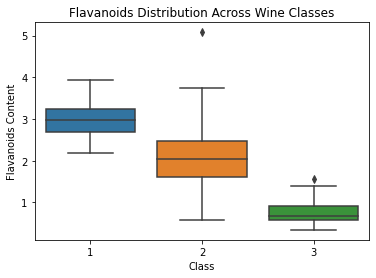

In [7]:

sns.boxplot(x='Class', y='Flavanoids', data=wine)
plt.title('Flavanoids Distribution Across Wine Classes')
plt.xlabel('Class')
plt.ylabel('Flavanoids Content')
plt.show()

In [8]:
X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10, 100],
                 'solver': ['liblinear', 'lbfgs', 'sag']}
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [5, 10, 15],
                 'min_samples_split': [2, 5, 10]}
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly']}
param_grid_lda = {'solver': ['svd', 'lsqr']}

In [9]:
# Initialize classifiers
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()
lda = LinearDiscriminantAnalysis()

# Hyperparameter tuning with cross-validation
lr_cv = GridSearchCV(lr, param_grid_lr, scoring='f1_weighted', cv=5)
rf_cv = GridSearchCV(rf, param_grid_rf, scoring='f1_weighted', cv=5)
svm_cv = GridSearchCV(svm, param_grid_svm, scoring='f1_weighted', cv=5)
lda_cv = GridSearchCV(lda, param_grid_lda, scoring='f1_weighted', cv=5)

# Train and evaluate classifiers
classifiers = [('Logistic Regression', lr_cv),
               ('Random Forest', rf_cv),
               ('Support Vector Machine', svm_cv),
               ('Linear Discriminant Analysis', lda_cv)]

for name, classifier in classifiers:
    # Train classifier
    classifier.fit(X_train, y_train)
    print(classifier.best_params_)
    
    # Make predictions on test set
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print evaluation results
    print(f'{name}:')
    print(f'F1 score: {f1:.4f}')
    print(f'Accuracy: {acc:.4f}')
    print(f'Confusion matrix:\n{cm}\n')

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

{'C': 1, 'solver': 'liblinear'}
Logistic Regression:
F1 score: 0.9778
Accuracy: 0.9778
Confusion matrix:
[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest:
F1 score: 1.0000
Accuracy: 1.0000
Confusion matrix:
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]

{'C': 1, 'kernel': 'linear'}
Support Vector Machine:
F1 score: 0.9779
Accuracy: 0.9778
Confusion matrix:
[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]

{'solver': 'svd'}
Linear Discriminant Analysis:
F1 score: 1.0000
Accuracy: 1.0000
Confusion matrix:
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]

